# Linear Regression - Swedish Insurance Dataset

For a new number of claims we will be able to predict the total payment of claims.

In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('/home/student/Downloads/swedish_insurance.csv')
df.columns=['Number of Insurance Claims','Amount of Insurance Paid']
df.head()

,Number of Insurance Claims,Amount of Insurance Paid
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


In [3]:
df.isna().sum()

Number of Insurance Claims    0
Amount of Insurance Paid      0
dtype: int64

In [4]:
x=df.iloc[:,:-1].values
x

array([[108],
       [ 19],
       [ 13],
       [124],
       [ 40],
       [ 57],
       [ 23],
       [ 14],
       [ 45],
       [ 10],
       [  5],
       [ 48],
       [ 11],
       [ 23],
       [  7],
       [  2],
       [ 24],
       [  6],
       [  3],
       [ 23],
       [  6],
       [  9],
       [  9],
       [  3],
       [ 29],
       [  7],
       [  4],
       [ 20],
       [  7],
       [  4],
       [  0],
       [ 25],
       [  6],
       [  5],
       [ 22],
       [ 11],
       [ 61],
       [ 12],
       [  4],
       [ 16],
       [ 13],
       [ 60],
       [ 41],
       [ 37],
       [ 55],
       [ 41],
       [ 11],
       [ 27],
       [  8],
       [  3],
       [ 17],
       [ 13],
       [ 13],
       [ 15],
       [  8],
       [ 29],
       [ 30],
       [ 24],
       [  9],
       [ 31],
       [ 14],
       [ 53],
       [ 26]])

In [5]:
y=df.iloc[:,-1].values
y

array([392.5,  46.2,  15.7, 422.2, 119.4, 170.9,  56.9,  77.5, 214. ,
        65.3,  20.9, 248.1,  23.5,  39.6,  48.8,   6.6, 134.9,  50.9,
         4.4, 113. ,  14.8,  48.7,  52.1,  13.2, 103.9,  77.5,  11.8,
        98.1,  27.9,  38.1,   0. ,  69.2,  14.6,  40.3, 161.5,  57.2,
       217.6,  58.1,  12.6,  59.6,  89.9, 202.4, 181.3, 152.8, 162.8,
        73.4,  21.3,  92.6,  76.1,  39.9, 142.1,  93. ,  31.9,  32.1,
        55.6, 133.3, 194.5, 137.9,  87.4, 209.8,  95.5, 244.6, 187.5])

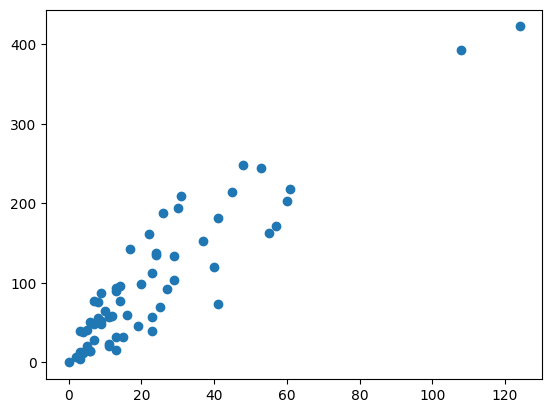

In [6]:
import matplotlib.pyplot as plt
plt.scatter(x,y)

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

In [8]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([120.91587228,  74.89213698,  64.27127498,  89.0532863 ,
       205.88276823,  64.27127498,  50.11012566, 163.39932026,
       230.66477955, 212.9633429 ,  32.408689  ,  71.35184965,
        57.19070032,  32.408689  , 124.45615961,  46.56983833,
       457.24316875,  64.27127498, 234.20506688])

In [9]:
print(model.predict([[6]]))

[39.48926366]


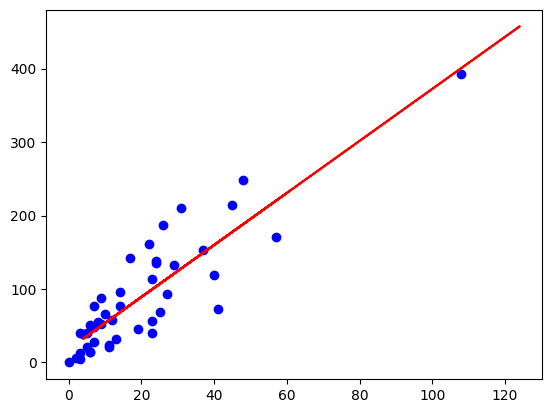

In [10]:
import matplotlib.pyplot as plt
plt.scatter(x_train,y_train,color='blue')
plt.plot(x_test,y_pred,color='red')

In [11]:
df1=pd.DataFrame({'Actualvalues':y_test,'Predicted values':y_pred})
df1

,Actualvalues,Predicted values
0,103.9,120.915872
1,59.6,74.892137
2,93.0,64.271275
3,98.1,89.053286
4,244.6,205.882768
5,15.7,64.271275
6,48.7,50.110126
7,181.3,163.399320
8,202.4,230.664780
9,162.8,212.963343


In [12]:
#intercept 
print(model.intercept_)
#slope
print(model.coef_)

18.247539677213723
[3.54028733]


In [13]:
#Performance Evaluation
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error
error=mean_absolute_error(y_test,y_pred)
percentage=mean_absolute_percentage_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
print(error)
print(percentage)
print(mse)

26.928440663868162
0.5464782001038896
1011.7373603863069


In [14]:
rmse=np.sqrt(mse)
rmse

31.80781917054841

In [15]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
score

0.9004126235569714